In [1]:
from ad_neural import *
from ad_learning import *
from data_gen import *
from experiment import *
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from realdata import *

## Continuous Outcome

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
aids_clinical_trials_group_study_175 = fetch_ucirepo(id=890) 
  
# data (as pandas dataframes) 
df = aids_clinical_trials_group_study_175.data.features 

In [4]:


COVS = ["age","wtkg","cd80","karnof", "cd40",
        "gender","race","homo","drugs","symptom","str2","hemo"]

X, A, R, meta = actg_to_arrays(df, keep_R_pos=False, R_log=False, neg_scal=True, covs=COVS)

lin_res = repeated_cv_value(
    lambda Xtr,Atr,Rtr,K: build_predict_ad_linear(Xtr,Atr,Rtr,K,alpha=1.0),
    X, A, R, K=meta["K"], n_repeats=100, base_seed=2025, verbose=True,
    standardize=True, cont_idx=meta["cont_idx"]
)
nn_res  = repeated_cv_value(
    lambda Xtr,Atr,Rtr,K: build_predict_ad_nn(Xtr,Atr,Rtr,K,epochs=10,lr=1e-3, hidden=[128,128]),
    X, A, R, K=meta["K"], n_repeats=100, base_seed=2025, verbose=True,
    standardize=True, cont_idx=meta["cont_idx"]
)
print("[Linear] mean value =", lin_res["mean"], "std =", lin_res["std"])
print("[NN]     mean value =", nn_res["mean"],  "std =", nn_res["std"])

 Repeat 1/100
 Repeat 2/100
 Repeat 3/100
 Repeat 4/100
 Repeat 5/100
 Repeat 6/100
 Repeat 7/100
 Repeat 8/100
 Repeat 9/100
 Repeat 10/100
 Repeat 11/100
 Repeat 12/100
 Repeat 13/100
 Repeat 14/100
 Repeat 15/100
 Repeat 16/100
 Repeat 17/100
 Repeat 18/100
 Repeat 19/100
 Repeat 20/100
 Repeat 21/100
 Repeat 22/100
 Repeat 23/100
 Repeat 24/100
 Repeat 25/100
 Repeat 26/100
 Repeat 27/100
 Repeat 28/100
 Repeat 29/100
 Repeat 30/100
 Repeat 31/100
 Repeat 32/100
 Repeat 33/100
 Repeat 34/100
 Repeat 35/100
 Repeat 36/100
 Repeat 37/100
 Repeat 38/100
 Repeat 39/100
 Repeat 40/100
 Repeat 41/100
 Repeat 42/100
 Repeat 43/100
 Repeat 44/100
 Repeat 45/100
 Repeat 46/100
 Repeat 47/100
 Repeat 48/100
 Repeat 49/100
 Repeat 50/100
 Repeat 51/100
 Repeat 52/100
 Repeat 53/100
 Repeat 54/100
 Repeat 55/100
 Repeat 56/100
 Repeat 57/100
 Repeat 58/100
 Repeat 59/100
 Repeat 60/100
 Repeat 61/100
 Repeat 62/100
 Repeat 63/100
 Repeat 64/100
 Repeat 65/100
 Repeat 66/100
 Repeat 67/100
 Rep

## Survival Outcome

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
aids_clinical_trials_group_study_175 = fetch_ucirepo(id=890) 

df_feat = aids_clinical_trials_group_study_175.data.features
df_tgt  = aids_clinical_trials_group_study_175.data.targets

df = pd.concat([df_feat, df_tgt], axis=1)

In [6]:

COVS = ["age","wtkg","cd80","karnof", "cd40",
        "gender","race","homo","drugs","symptom","str2","hemo"]

X, A, T, Delta, meta = actg_to_arrays_surv(df, covs=COVS)
cont_idx = meta["cont_idx"]

lin_res_real = repeated_cv_value_surv(
    lambda Xtr, Atr, Ttr, Dtr, K: build_predict_ad_linear_surv(
        Xtr, Atr, Ttr, Dtr, K, lam=0.05, step=1e-2
    ),
    X, A, T, Delta, meta["K"],
    n_repeats=100, base_seed=2025,
    verbose=False, standardize=True, cont_idx=cont_idx
)

nn_res_real = repeated_cv_value_surv(
    lambda Xtr, Atr, Ttr, Dtr, K: build_predict_ad_nn_surv(
        Xtr, Atr, Ttr, Dtr, K, epochs=100, lr=1e-3, hidden=[128,128]
    ),
    X, A, T, Delta, meta["K"],
    n_repeats=100, base_seed=2025, 
    verbose=False, standardize=True, cont_idx=cont_idx, 
)

print("\n===== REAL DATA (ACTG175) =====")
print("[Linear Surv-AD] value mean =", lin_res_real["mean"],
      " std =", lin_res_real["std"])
print("[NN Surv-AD]     value mean =", nn_res_real["mean"],
      " std =", nn_res_real["std"])

 Repeat 1/100
 Repeat 2/100
 Repeat 3/100
 Repeat 4/100
 Repeat 5/100
 Repeat 6/100
 Repeat 7/100
 Repeat 8/100
 Repeat 9/100
 Repeat 10/100
 Repeat 11/100
 Repeat 12/100
 Repeat 13/100
 Repeat 14/100
 Repeat 15/100
 Repeat 16/100
 Repeat 17/100
 Repeat 18/100
 Repeat 19/100
 Repeat 20/100
 Repeat 21/100
 Repeat 22/100
 Repeat 23/100
 Repeat 24/100
 Repeat 25/100
 Repeat 26/100
 Repeat 27/100
 Repeat 28/100
 Repeat 29/100
 Repeat 30/100
 Repeat 31/100
 Repeat 32/100
 Repeat 33/100
 Repeat 34/100
 Repeat 35/100
 Repeat 36/100
 Repeat 37/100
 Repeat 38/100
 Repeat 39/100
 Repeat 40/100
 Repeat 41/100
 Repeat 42/100
 Repeat 43/100
 Repeat 44/100
 Repeat 45/100
 Repeat 46/100
 Repeat 47/100
 Repeat 48/100
 Repeat 49/100
 Repeat 50/100
 Repeat 51/100
 Repeat 52/100
 Repeat 53/100
 Repeat 54/100
 Repeat 55/100
 Repeat 56/100
 Repeat 57/100
 Repeat 58/100
 Repeat 59/100
 Repeat 60/100
 Repeat 61/100
 Repeat 62/100
 Repeat 63/100
 Repeat 64/100
 Repeat 65/100
 Repeat 66/100
 Repeat 67/100
 Rep

===== ACTG175 Survival Summary =====

--- Observed time (T = time) ---
mean   = 879.0982
median = 997.0000
25%    = 727.0000
50%    = 997.0000
75%    = 1091.0000
min    = 14.0000
max    = 1231.0000

--- Event/Censoring Rates ---
event rate     = 0.2436
censoring rate = 0.7564


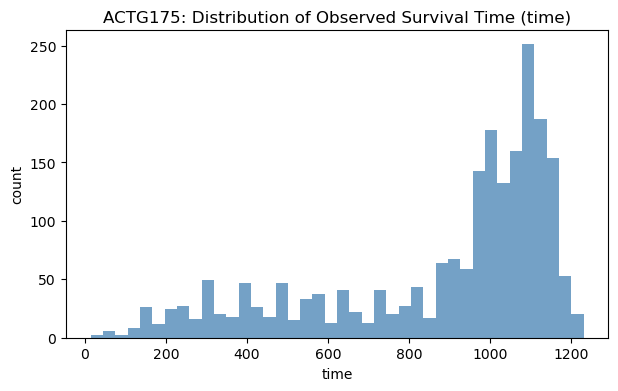

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

# ---------------------------
# 1) 데이터 로드 & 결합
# ---------------------------
actg = fetch_ucirepo(id=890)

df_feat = actg.data.features
df_tgt  = actg.data.targets

df = pd.concat([df_feat, df_tgt], axis=1)

# 생존시간과 검열 여부
T = df["time"].astype(float).to_numpy()
Delta = df["cid"].astype(int).to_numpy()

# ---------------------------
# 2) 요약 통계량 함수
# ---------------------------
def summary_stats(arr):
    return {
        "mean": np.mean(arr),
        "median": np.median(arr),
        "25%": np.percentile(arr, 25),
        "50%": np.percentile(arr, 50),
        "75%": np.percentile(arr, 75),
        "min": np.min(arr),
        "max": np.max(arr),
    }

# True event time은 관측 불가 → Observed(T)만 요약
obs_stats = summary_stats(T)

# censoring rate
censor_rate = np.mean(1 - Delta)
event_rate   = np.mean(Delta)

# ---------------------------
# 3) 출력
# ---------------------------
print("===== ACTG175 Survival Summary =====\n")
print("--- Observed time (T = time) ---")
for k, v in obs_stats.items():
    print(f"{k:6s} = {v:.4f}")

print("\n--- Event/Censoring Rates ---")
print(f"event rate     = {event_rate:.4f}")
print(f"censoring rate = {censor_rate:.4f}")

# ---------------------------
# 4) 히스토그램
# ---------------------------
plt.figure(figsize=(7,4))
plt.hist(T, bins=40, color='steelblue', alpha=0.75)
plt.title("ACTG175: Distribution of Observed Survival Time (time)")
plt.xlabel("time")
plt.ylabel("count")
plt.show()


In [8]:
df['cid'].value_counts()

cid
0    1618
1     521
Name: count, dtype: int64